In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set(style='whitegrid', palette='muted')

# 1.Data Preprocessing

## 1.1 Load Data

In [3]:
df = pd.read_csv('migraine_symptom_classification.csv')
df.head(10)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
5,49,1,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Migraine without aura
6,27,1,5,1,1,3,1,0,1,1,...,1,1,0,0,0,0,0,0,0,Basilar-type aura
7,24,1,1,1,1,2,1,0,1,1,...,1,0,0,0,0,0,0,0,1,Typical aura with migraine
8,50,1,5,1,1,2,1,1,1,1,...,1,0,0,0,0,0,0,0,1,Typical aura with migraine
9,23,1,1,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

## 1.2 Data Cleaning

Since there are no missing values, missing value imputation is not required. 

In [5]:
df.duplicated().sum()

6

In [6]:
#delete the duplicates
df.drop_duplicates(inplace=True)

## 1.3 Data Transformation

In [7]:
le = LabelEncoder()
df['Type_encoded'] = le.fit_transform(df['Type'])

In [8]:
#label:code
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping

{'Basilar-type aura': 0,
 'Familial hemiplegic migraine': 1,
 'Migraine without aura': 2,
 'Other': 3,
 'Sporadic hemiplegic migraine': 4,
 'Typical aura with migraine': 5,
 'Typical aura without migraine': 6}

## 1.4 Feature Engineering

Given the high dimensionality of the dataset, I conduct feature selection to identify and retain only the most informative attributes. Specifically, I remove columns with constant values (e.g., `Ataxia`), which do not contribute to classification or clustering tasks.
In addition, I visualize feature correlations to detect potential redundancy.

In [9]:
unique_counts=df.nunique()
single_value_cols = unique_counts[unique_counts == 1].index.tolist()
single_value_cols

['Ataxia']

In [10]:
df = df.drop(columns=single_value_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 399
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           394 non-null    int64 
 1   Duration      394 non-null    int64 
 2   Frequency     394 non-null    int64 
 3   Location      394 non-null    int64 
 4   Character     394 non-null    int64 
 5   Intensity     394 non-null    int64 
 6   Nausea        394 non-null    int64 
 7   Vomit         394 non-null    int64 
 8   Phonophobia   394 non-null    int64 
 9   Photophobia   394 non-null    int64 
 10  Visual        394 non-null    int64 
 11  Sensory       394 non-null    int64 
 12  Dysphasia     394 non-null    int64 
 13  Dysarthria    394 non-null    int64 
 14  Vertigo       394 non-null    int64 
 15  Tinnitus      394 non-null    int64 
 16  Hypoacusis    394 non-null    int64 
 17  Diplopia      394 non-null    int64 
 18  Defect        394 non-null    int64 
 19  Conscien

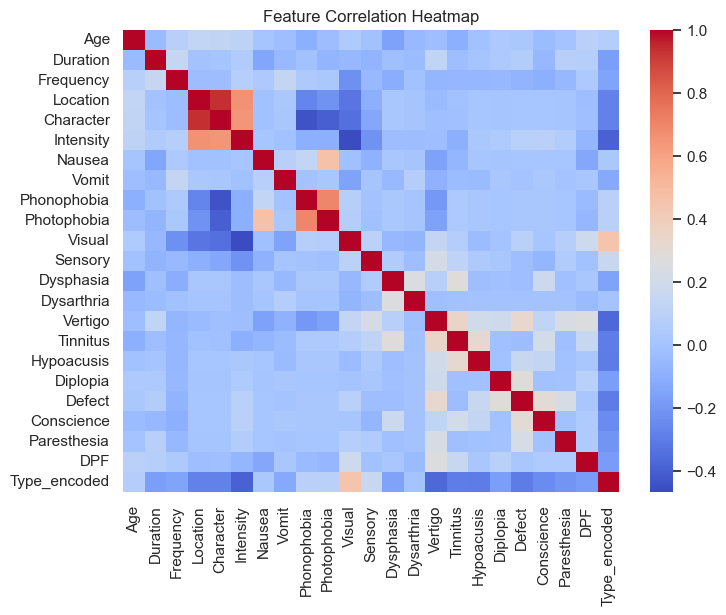

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [12]:
#Identify pairs of features with high correlation (absolute value > 0.75, excluding self-correlation)
corr_matrix = df.corr(numeric_only=True)
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.9:
            high_corr_pairs.append((col1, col2, round(corr_val, 2)))

for pair in high_corr_pairs:
    print(f"{pair[0]} & {pair[1]}: correlation = {pair[2]}")

Location & Character: correlation = 0.93


Such strong correlation may lead to multicollinearity, which can negatively affect certain models by inflating variance and making model interpretation difficult.
To reduce redundancy, I removed the `Character` feature and retained `Location`, as it provides similar information and has slightly stronger interpretability in this context.

In [13]:
df = df.drop(columns=['Character'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 399
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           394 non-null    int64 
 1   Duration      394 non-null    int64 
 2   Frequency     394 non-null    int64 
 3   Location      394 non-null    int64 
 4   Intensity     394 non-null    int64 
 5   Nausea        394 non-null    int64 
 6   Vomit         394 non-null    int64 
 7   Phonophobia   394 non-null    int64 
 8   Photophobia   394 non-null    int64 
 9   Visual        394 non-null    int64 
 10  Sensory       394 non-null    int64 
 11  Dysphasia     394 non-null    int64 
 12  Dysarthria    394 non-null    int64 
 13  Vertigo       394 non-null    int64 
 14  Tinnitus      394 non-null    int64 
 15  Hypoacusis    394 non-null    int64 
 16  Diplopia      394 non-null    int64 
 17  Defect        394 non-null    int64 
 18  Conscience    394 non-null    int64 
 19  Paresthe

## 1.5 Visualization and Analysis

### 1.5.1 Distribution of Migraine Types 

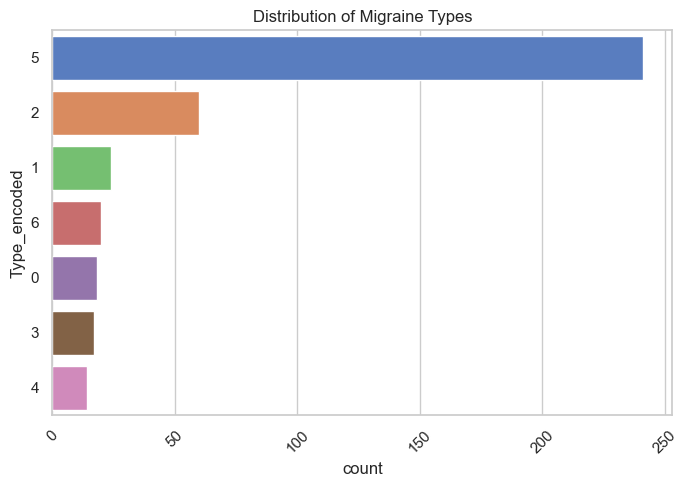

In [14]:
type_order = df['Type_encoded'].value_counts().index
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Type_encoded', order=type_order)
plt.title('Distribution of Migraine Types')
plt.xticks(rotation=45)
plt.show()

As can be seen from the above figure, there is a significant difference in the distribution of different types of migraines in the data. It is necessary to avoid algorithms that are sensitive to class imbalance in the later stages.

### 1.5.2 Distributions of Other Univariate 

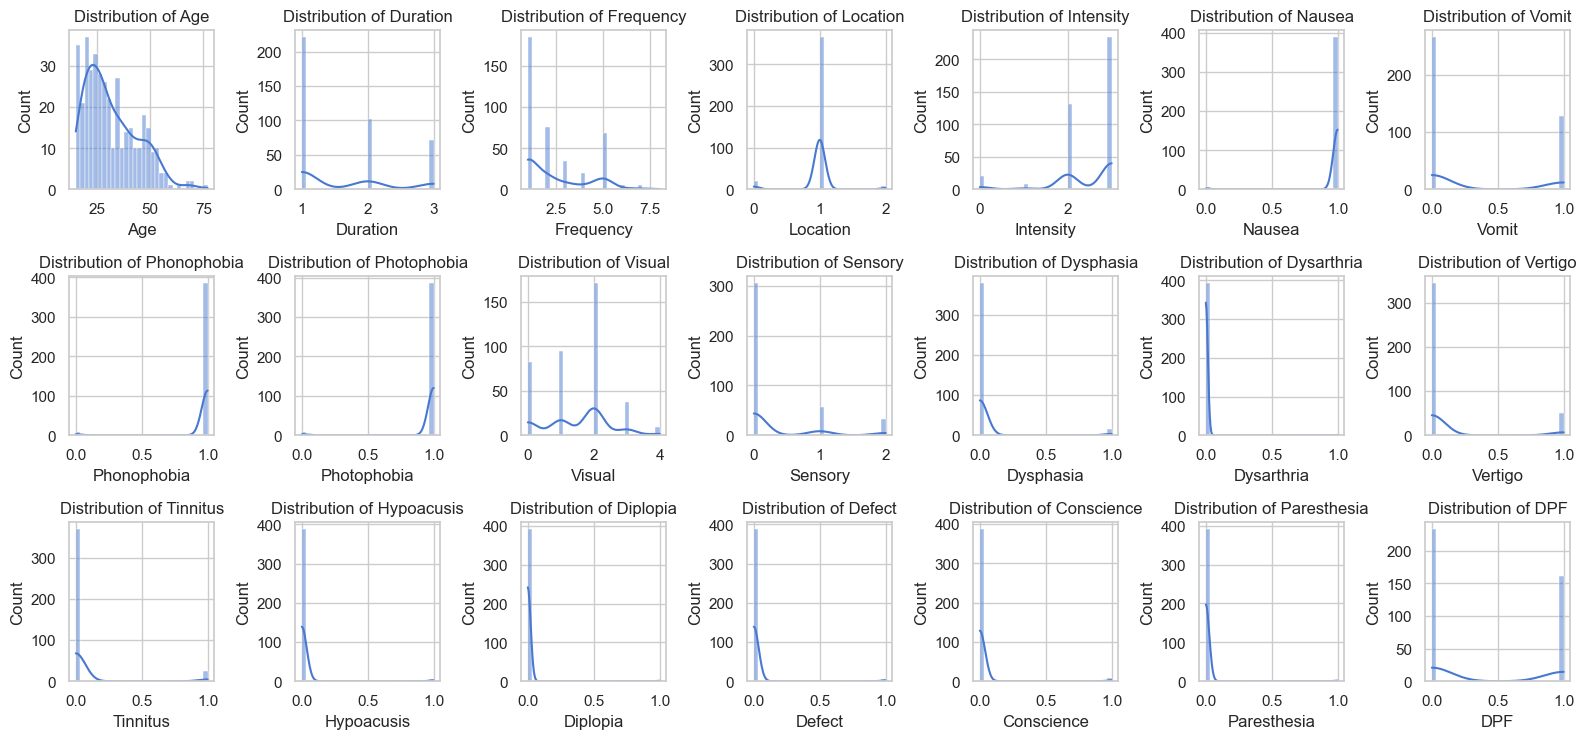

In [15]:
num_cols = df.select_dtypes(include=['int64'])
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 7, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

It can be seen from the figure that the Age variable shows a significantly right-skewed distribution. The majority of patients are concentrated between the ages of 20 and 40, belonging to a typical young onset group.
Variables such as Duration, Frequency and Location have obvious extreme values. 
Binary variables such as Nausea, Vomit and Photophobia have extremely skewed distributions, where the number of samples with a value of 0 is much larger than that with a value of 1. It should be necessary to introduce the Anomaly Detection method to further explore the latent abnormal data points in these variables.

### 1.5.3 Relationship between Variables and Types

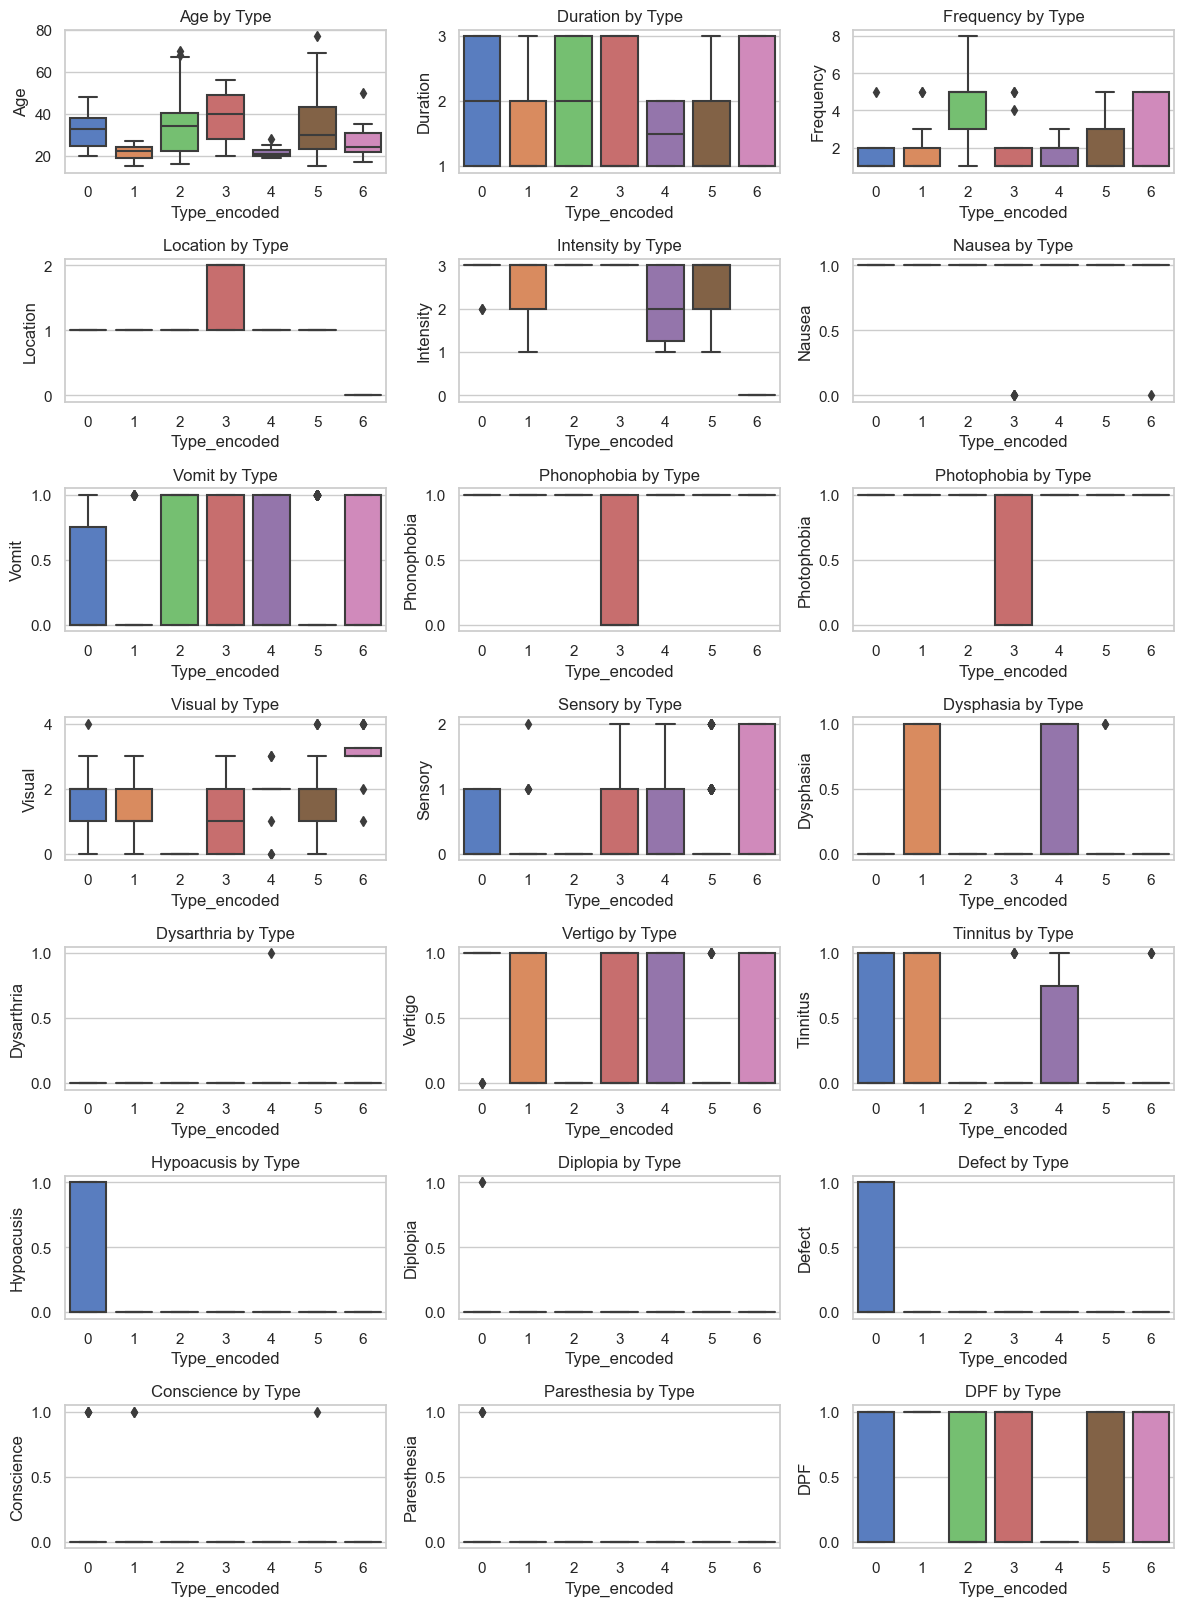

In [16]:
plt.figure(figsize=(12, 300))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols)+1)//3, 3, i)
    sns.boxplot(x='Type_encoded', y=col, data=df)
    plt.title(f'{col} by Type')
plt.tight_layout()
plt.show()

Variables such as Age, Photophobia, Phonophobia, Visual, Sensory, and Intensity have obvious differentiations on multiple types and can be prioritized for modeling or feature selection.

### 1.5 4 Relationship between Vital Viriables

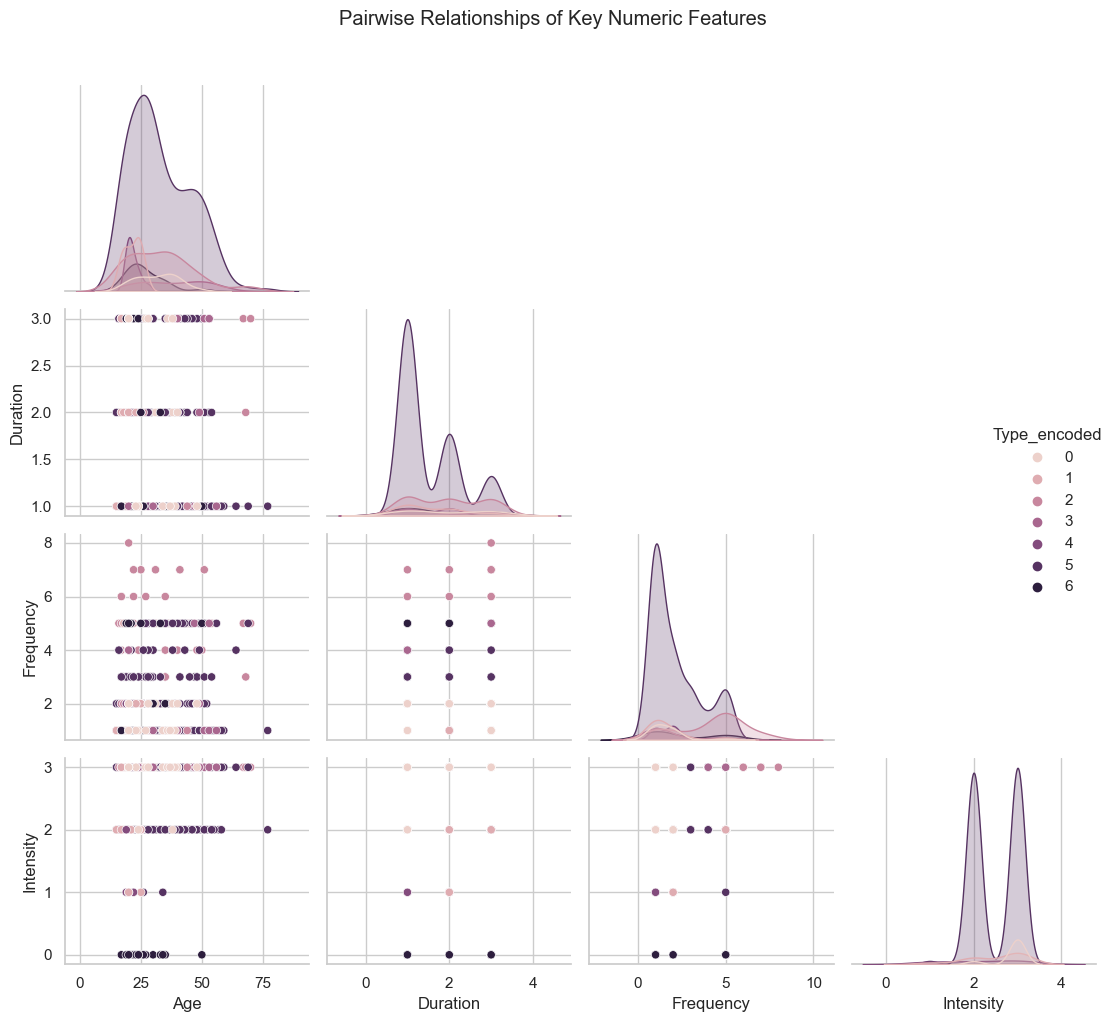

In [20]:
important_vars = ['Age', 'Duration', 'Frequency', 'Intensity']
sns.pairplot(df, vars=important_vars, hue='Type_encoded', diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships of Key Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

### 1.5.5  Frequency Follows the Trend of Age

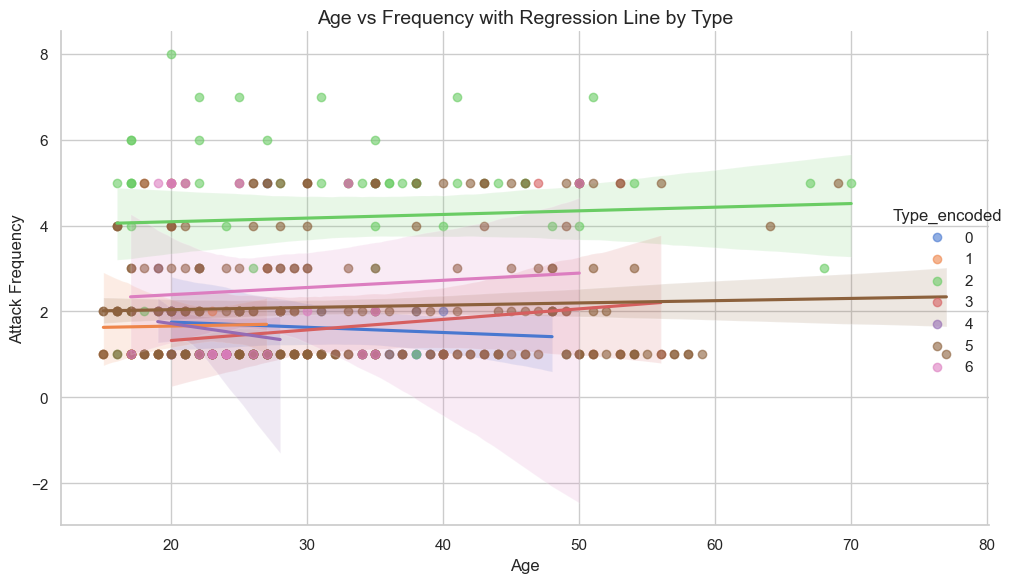

In [22]:
sns.lmplot(
    x='Age',
    y='Frequency',
    hue='Type_encoded',
    data=df,
    aspect=1.5,
    height=6,
    scatter_kws={'alpha':0.6}
)

plt.title("Age vs Frequency with Regression Line by Type", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Attack Frequency")
plt.tight_layout()
plt.show()

In [23]:
df.to_csv("clean_data.csv", index=False)